<a href="https://colab.research.google.com/github/AntoonGoderis/Deep-Learning/blob/Antoon/assignment_2_random_interpret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import cv2

import os
import json
import ast

import numpy as np
import pandas as pd
import cv2
from scipy.optimize import curve_fit

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD, AdamW

!pip install keras-tuner
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.regularizers import l2
from keras.utils import to_categorical

import keras_tuner as kt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import zipfile

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import preprocess_input as pi_efficient
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pi_resnet

from tensorflow.keras import layers, models, preprocessing






   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.0 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile

# Replace 'path/to/your_file.zip' with the path to your zip file in Google Drive
zip_file_path = '/content/drive/My Drive/Assign2/training_data.zip'
extract_path = '/content/simpsons-mnist-master/dataset/rgb/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

zip_file_path = '/content/drive/My Drive/Assign2/test_data.zip'
extract_path = '/content/simpsons-mnist-master/dataset/rgb/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/drive


In [4]:
base_dir = os.getcwd()

train_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "train")
test_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test")
#test_rotated_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_rotated")
#test_zoomed_in_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_zoomed_in")
#test_zoomed_out_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_zoomed_out")

image_data = []
test_data = []
test_r_data = []
test_zi_data = []
test_zo_data = []

for class_name in os.listdir(train_path):

    class_path = os.path.join(train_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            image_data.append((os.path.join(class_path, img_name), class_name))

df_train = pd.DataFrame(image_data, columns=["image_path", "label"])
print(df_train.head())

for class_name in os.listdir(test_path):

    class_path = os.path.join(test_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_data.append((os.path.join(class_path, img_name), class_name))


df_test = pd.DataFrame(test_data, columns=["image_path", "label"])
print(df_test.head())

"""
for class_name in os.listdir(test_rotated_path):

    class_path = os.path.join(test_rotated_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_r_data.append((os.path.join(class_path, img_name), class_name))

df_test_r = pd.DataFrame(test_r_data, columns=["image_path", "label"])
print(df_test_r.head())

for class_name in os.listdir(test_zoomed_in_path):

    class_path = os.path.join(test_zoomed_in_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_zi_data.append((os.path.join(class_path, img_name), class_name))

df_test_zi = pd.DataFrame(test_zi_data, columns=["image_path", "label"])
print(df_test_zi.head())

for class_name in os.listdir(test_zoomed_out_path):

    class_path = os.path.join(test_zoomed_out_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_zo_data.append((os.path.join(class_path, img_name), class_name))

df_test_zo = pd.DataFrame(test_zo_data, columns=["image_path", "label"])
print(df_test_zo.head())
"""

                                          image_path              label
0  /content/simpsons-mnist-master/dataset/rgb/tra...  principal_skinner
1  /content/simpsons-mnist-master/dataset/rgb/tra...  principal_skinner
2  /content/simpsons-mnist-master/dataset/rgb/tra...  principal_skinner
3  /content/simpsons-mnist-master/dataset/rgb/tra...  principal_skinner
4  /content/simpsons-mnist-master/dataset/rgb/tra...  principal_skinner
                                          image_path              label
0  /content/simpsons-mnist-master/dataset/rgb/tes...  principal_skinner
1  /content/simpsons-mnist-master/dataset/rgb/tes...  principal_skinner
2  /content/simpsons-mnist-master/dataset/rgb/tes...  principal_skinner
3  /content/simpsons-mnist-master/dataset/rgb/tes...  principal_skinner
4  /content/simpsons-mnist-master/dataset/rgb/tes...  principal_skinner


'\nfor class_name in os.listdir(test_rotated_path):\n\n    class_path = os.path.join(test_rotated_path, class_name)\n\n    if os.path.isdir(class_path):\n        for img_name in os.listdir(class_path):\n            test_r_data.append((os.path.join(class_path, img_name), class_name))\n\ndf_test_r = pd.DataFrame(test_r_data, columns=["image_path", "label"])\nprint(df_test_r.head())\n\nfor class_name in os.listdir(test_zoomed_in_path):\n\n    class_path = os.path.join(test_zoomed_in_path, class_name)\n\n    if os.path.isdir(class_path):\n        for img_name in os.listdir(class_path):\n            test_zi_data.append((os.path.join(class_path, img_name), class_name))\n\ndf_test_zi = pd.DataFrame(test_zi_data, columns=["image_path", "label"])\nprint(df_test_zi.head())\n\nfor class_name in os.listdir(test_zoomed_out_path):\n\n    class_path = os.path.join(test_zoomed_out_path, class_name)\n\n    if os.path.isdir(class_path):\n        for img_name in os.listdir(class_path):\n            test_

In [5]:
import cv2

def load_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image at {img_path}")
        return None
    img = img / 255.0
    return img

df_train["image_array"] = df_train["image_path"].apply(lambda x: load_image(x))
df_test["image_array"] = df_test["image_path"].apply(lambda x: load_image(x))



"""
def load_image(img_path):
    img = cv2.imread(img_path)
    img = img / 255.0
    return img


df_train["image_array"] = df_train["image_path"].apply(lambda x: load_image(x))

df_test["image_array"] = df_test["image_path"].apply(lambda x: load_image(x))

df_test_r["image_array"] = df_test_r["image_path"].apply(lambda x: load_image(x))

df_test_zi["image_array"] = df_test_zi["image_path"].apply(lambda x: load_image(x))

df_test_zo["image_array"] = df_test_zo["image_path"].apply(lambda x: load_image(x))
"""

sample_img = df_train["image_array"][0]
print(sample_img.shape)

(28, 28, 3)


In [6]:
num_classes = df_train.label.nunique()
print(num_classes)

10


In [7]:
label_encoder = LabelEncoder()
df_train["label_encoded"] = label_encoder.fit_transform(df_train["label"])
df_test["label_encoded"] = label_encoder.transform(df_test["label"])
"""
df_test_r["label_encoded"] = label_encoder.transform(df_test_r["label"])
df_test_zi["label_encoded"] = label_encoder.transform(df_test_zi["label"])
df_test_zo["label_encoded"] = label_encoder.transform(df_test_zo["label"])
"""


X_train_valid = np.stack(df_train["image_array"].values)


y_train_valid = to_categorical(df_train["label_encoded"], num_classes=num_classes)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=42)

X_test = np.stack(df_test["image_array"].values)
y_test = to_categorical(df_test["label_encoded"], num_classes=num_classes)
"""
X_test_r = np.stack(df_test_r["image_array"].values)
y_test_r = to_categorical(df_test_r["label_encoded"], num_classes=num_classes)

X_test_zi = np.stack(df_test_zi["image_array"].values)
y_test_zi = to_categorical(df_test_zi["label_encoded"], num_classes=num_classes)

X_test_zo = np.stack(df_test_zo["image_array"].values)
y_test_zo = to_categorical(df_test_zo["label_encoded"], num_classes=num_classes)
"""

print(X_train_valid.shape)
print(y_train_valid.shape)



(8000, 28, 28, 3)
(8000, 10)


In [8]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Simpsons_Model/best_model.keras")  # Load the full model

In [9]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 300)         │           8,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 300)         │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 300)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 300)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 300)         │         810,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 300)         │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 300)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 300)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 300)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 300)         │         810,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 300)         │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 14, 14, 300)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 300)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 300)         │         810,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 300)         │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 14, 14, 300)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 300)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 300)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 300)           │         810,300 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,340,632 (66.15 MB)

 Trainable params: 5,778,610 (22.04 MB)

 Non-trainable params: 4,800 (18.75 KB)

 Optimizer params: 11,557,222 (44.09 MB)

# Occlusion test

We found that using a small occlusion size of 4 brought out specific facial regions. It depends on the image whether perturbations in the region of the face appear as impactful. For example for images 15 (Bart Simpson) and 110 (Homer), the facial region show up as impactful whereas in image 10 (Milhouse) no region is identified.

# Occlusion test - image 15 Bart Simpson

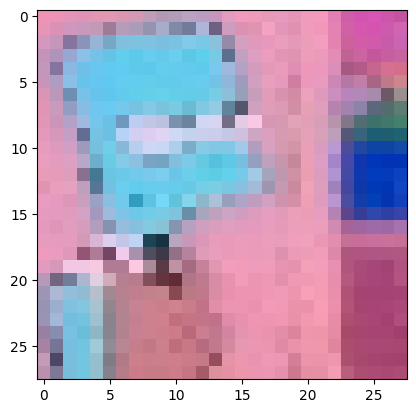

In [163]:
selected_ix = 15
test_instance = X_train[selected_ix]
plt.imshow(test_instance)

In [164]:
def occlude_image(img, pos=(0, 0), size=3, color=(0.5, 0.5, 0.5)):
    img = img.copy()
    img[pos[0] : pos[0] + size, pos[1] : pos[1] + size, :] = color
    return img

In [165]:
def generate_occluded_images(img, occlusion_size=3, **kwargs):
    images = []
    for y in range(0, img.shape[0] - occlusion_size + 1):
        for x in range(0, img.shape[1] - occlusion_size + 1):
            images.append(occlude_image(img, pos=(y, x), **kwargs))
    return np.array(images)

In [166]:
occlusion_size = 4
occluded_images = generate_occluded_images(test_instance, occlusion_size=occlusion_size)

In [167]:
original_pred = model.predict(np.array([test_instance]))[0]
original_prob = original_pred[np.argmax(original_pred)]
original_pred, np.argmax(original_pred), original_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


(array([9.9726367e-01, 3.9023055e-07, 4.8390660e-08, 1.3307794e-09,
        2.7357303e-03, 6.3448464e-09, 6.3511337e-08, 2.7351023e-08,
        2.7000671e-09, 4.5192441e-09], dtype=float32),
 0,
 0.99726367)

In [168]:
predictions = model.predict(occluded_images)
predictions.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step


(625, 10)

In [169]:
all_drops = [max(0, original_prob - predictions[i, np.argmax(original_pred)]) for i in range(len(predictions))]
print("Min drop:", np.min(all_drops))
print("Max drop:", np.max(all_drops))
print("Mean drop:", np.mean(all_drops))

Min drop: 0.0
Max drop: 0.997261643409729
Mean drop: 0.09982251014709473


Multiple drops in probability


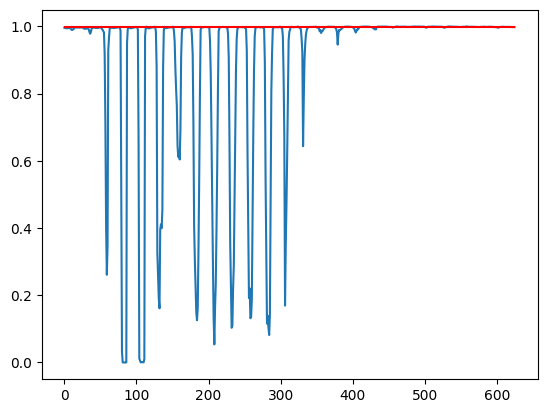

In [170]:
plt.plot(predictions[:, np.argmax(original_pred)])
plt.hlines(original_prob, xmin=0, xmax=len(predictions), colors="r")

Heatmap

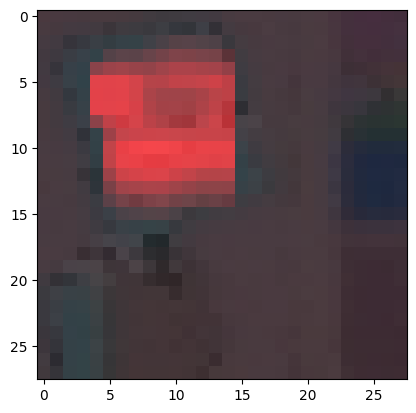

In [171]:
from sklearn.preprocessing import minmax_scale
heatmap = np.zeros(test_instance.shape)

# The assertion should be placed outside the loops
# assert pred_idx == len(occluded_images)

heatmap = np.zeros(test_instance.shape)

pred_idx = 0
for y in range(0, heatmap.shape[0] - occlusion_size + 1):
    for x in range(0, heatmap.shape[1] - occlusion_size + 1):
        probs = predictions[pred_idx, :]
        if np.argmax(probs) != np.argmax(original_pred):
            heatmap[y : y + occlusion_size, x : x + occlusion_size, :] += (1, 0, 0)
        pred_idx += 1

#Assert after the loop completes
assert pred_idx == len(occluded_images), f"pred_idx: {pred_idx}, len(occluded_images): {len(occluded_images)}"

heatmap[:, :, 0] = minmax_scale(heatmap[:, :, 0]).clip(max =1)

plt.imshow(test_instance, alpha=0.6)
plt.imshow(heatmap, alpha=0.7)

In [172]:
np.argmax(original_pred)

0

# Occlusion test - image 110 Homer *Simpson*

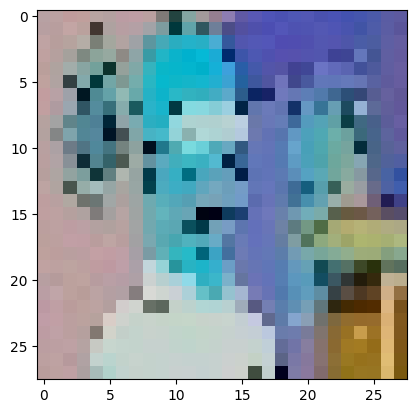

In [174]:
selected_ix = 110
test_instance = X_train[selected_ix]
plt.imshow(test_instance)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step
Min drop: 0.0
Max drop: 0.745099663734436
Mean drop: 0.00400254077911377


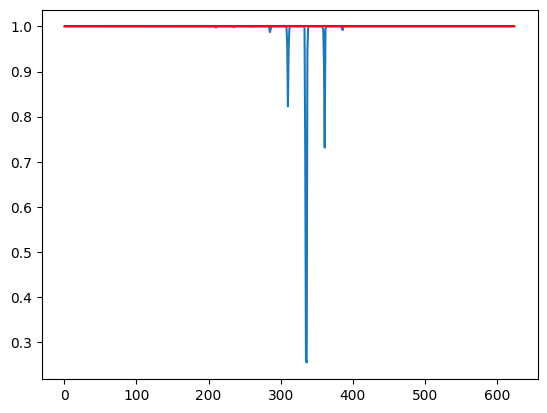

In [175]:
occlusion_size = 4
occluded_images = generate_occluded_images(test_instance, occlusion_size=occlusion_size)
original_pred = model.predict(np.array([test_instance]))[0]
original_prob = original_pred[np.argmax(original_pred)]
original_pred, np.argmax(original_pred), original_prob
predictions = model.predict(occluded_images)
predictions.shape
all_drops = [max(0, original_prob - predictions[i, np.argmax(original_pred)]) for i in range(len(predictions))]
print("Min drop:", np.min(all_drops))
print("Max drop:", np.max(all_drops))
print("Mean drop:", np.mean(all_drops))
plt.plot(predictions[:, np.argmax(original_pred)])
plt.hlines(original_prob, xmin=0, xmax=len(predictions), colors="r")




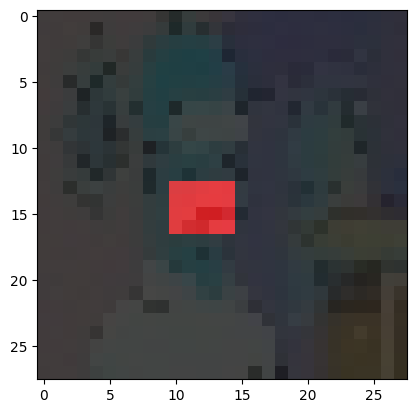

In [176]:
from sklearn.preprocessing import minmax_scale
heatmap = np.zeros(test_instance.shape)

assert pred_idx == len(occluded_images)

heatmap = np.zeros(test_instance.shape)

pred_idx = 0
for y in range(0, heatmap.shape[0] - occlusion_size + 1):
    for x in range(0, heatmap.shape[1] - occlusion_size + 1):
        probs = predictions[pred_idx, :]
        if np.argmax(probs) != np.argmax(original_pred):
            heatmap[y : y + occlusion_size, x : x + occlusion_size, :] += (1, 0, 0)
        pred_idx += 1

heatmap[:, :, 0] = minmax_scale(heatmap[:, :, 0]).clip(max =1)

plt.imshow(test_instance, alpha=0.6)
plt.imshow(heatmap, alpha=0.7)


# Occlusion test - image 10 Milhouse

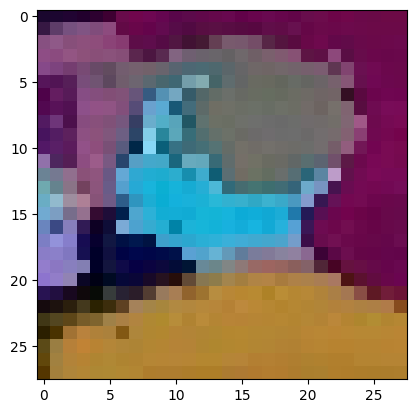

In [177]:
selected_ix = 10
test_instance = X_train[selected_ix]
plt.imshow(test_instance)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step
Min drop: 0.0
Max drop: 0.0002872943878173828
Mean drop: 2.247333526611328e-06


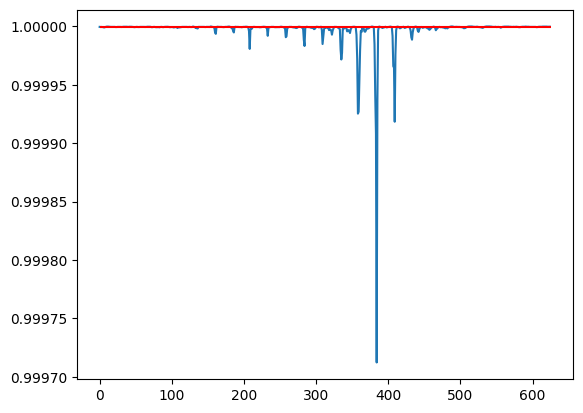

In [178]:
occlusion_size = 4
occluded_images = generate_occluded_images(test_instance, occlusion_size=occlusion_size)
original_pred = model.predict(np.array([test_instance]))[0]
original_prob = original_pred[np.argmax(original_pred)]
original_pred, np.argmax(original_pred), original_prob
predictions = model.predict(occluded_images)
predictions.shape
all_drops = [max(0, original_prob - predictions[i, np.argmax(original_pred)]) for i in range(len(predictions))]
print("Min drop:", np.min(all_drops))
print("Max drop:", np.max(all_drops))
print("Mean drop:", np.mean(all_drops))
plt.plot(predictions[:, np.argmax(original_pred)])
plt.hlines(original_prob, xmin=0, xmax=len(predictions), colors="r")




In [179]:
original_pred, np.argmax(original_pred), original_prob

(array([1.9090820e-09, 2.6428801e-09, 2.7177656e-09, 4.0850080e-11,
        2.8840080e-11, 7.1957149e-11, 2.7138768e-08, 3.2214058e-07,
        5.0778076e-11, 9.9999964e-01], dtype=float32),
 9,
 0.99999964)

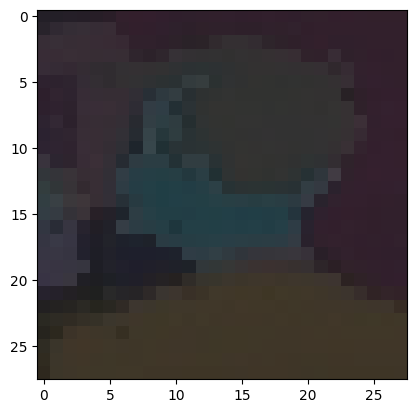

In [180]:
from sklearn.preprocessing import minmax_scale
heatmap = np.zeros(test_instance.shape)

assert pred_idx == len(occluded_images)

heatmap = np.zeros(test_instance.shape)

pred_idx = 0
for y in range(0, heatmap.shape[0] - occlusion_size + 1):
    for x in range(0, heatmap.shape[1] - occlusion_size + 1):
        probs = predictions[pred_idx, :]
        if np.argmax(probs) != np.argmax(original_pred):
            heatmap[y : y + occlusion_size, x : x + occlusion_size, :] += (1, 0, 0)
        pred_idx += 1

heatmap[:, :, 0] = minmax_scale(heatmap[:, :, 0]).clip(max =1)

plt.imshow(test_instance, alpha=0.6)
plt.imshow(heatmap, alpha=0.7)


# Saliency **maps**

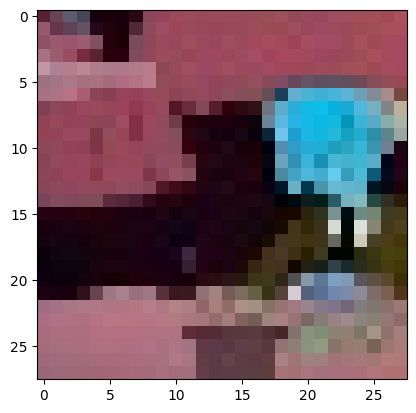

In [181]:
test_instance = X_train[105]
plt.imshow(test_instance)

In [182]:
original_pred = model.predict(np.array([test_instance]))[0]
original_idx = np.argmax(original_pred)
original_prob = original_pred[original_idx]
original_pred, original_idx, original_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


(array([1.2614331e-11, 1.0000000e+00, 3.3163053e-10, 1.9806591e-15,
        2.4081275e-14, 1.2163455e-14, 3.2143647e-14, 3.1002854e-12,
        9.4473439e-18, 3.6596472e-12], dtype=float32),
 1,
 1.0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Original probability: 1.0 -- new probability: 1.0


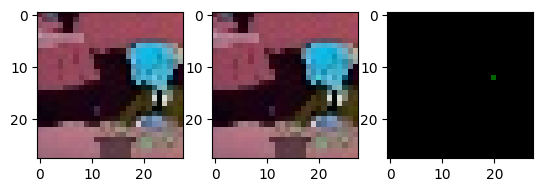

In [189]:
import numpy as np
import tensorflow as tf
from dl_utils import KerasOptimizer, clone_and_set_weights, get_model_weights, load_or_build

def prob_diff_loss(img, oimg, oidx, oprob, **k):
    img = tf.cast(img, dtype=tf.float32)  # Ensure float32
    oimg = tf.cast(oimg, dtype=tf.float32)  # Ensure float32
    return model(img + oimg)[0, oidx] - oprob

def l1_loss(img, l=0.1, **k):
    return tf.reduce_max(tf.abs(img)) * l  # Use TensorFlow's reduce_max

optimizer = KerasOptimizer([prob_diff_loss, l1_loss])
img_optimized = np.zeros((1,) + test_instance.shape, dtype=np.float32)  # Ensure float32

img_optimized, loss = optimizer.optimize(
    img_optimized, iterations=50, learning_rate=0.1, oimg=test_instance, oidx=original_idx, oprob=original_prob
)

x = np.clip(img_optimized + test_instance, 0, 1)[0]
new_prob = model.predict(np.array([x], dtype=np.float32))[0][original_idx]  # Ensure input to model is float32

print("Original probability:", original_prob, "-- new probability:", new_prob)

fig, ax = plt.subplots(ncols=3)
ax[0].imshow(test_instance)
ax[1].imshow(x)
ax[2].imshow((x - test_instance) * 4)

# Dimensionality reduction with PCA and t-SNE

Dimensionality reduction from 300 to 2 dimensions via t-SNE obtains good separability between the classes.

In [201]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from sklearn.manifold import TSNE
from keras import backend as K
from keras import Model
from keras.datasets import cifar10
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras.utils import to_categorical

from dl_utils import load_or_build


conv_layers = [layer.name for layer in model.layers if layer.name.startswith("conv2d")]
conv_layers


['conv2d',
 'conv2d_1',
 'conv2d_2',
 'conv2d_3',
 'conv2d_4',
 'conv2d_5',
 'conv2d_6',
 'conv2d_7']

In [202]:
def get_layer_output(model, layer_name):
    return Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output])

In [209]:
# We only use the first num_images images here to keep the plot readable
num_images = 300
get_activations = get_layer_output(model, "dense")
activations = get_activations(X_train[:num_images])

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(300, 28, 28, 3))
  warnings.warn(msg)


In [210]:
activations.shape

TensorShape([300, 300])

In [211]:
tsne = TSNE(init="pca", learning_rate=120)

In [212]:
transformed = tsne.fit_transform(activations)

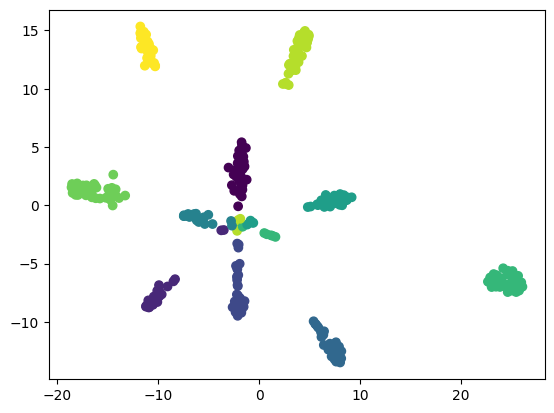

In [214]:
# Convert y_train back to categoricals so matplotlib knows what to do with it
plt.scatter(transformed[:, 0], transformed[:, 1], c=np.where(1 == y_train[:num_images])[1])

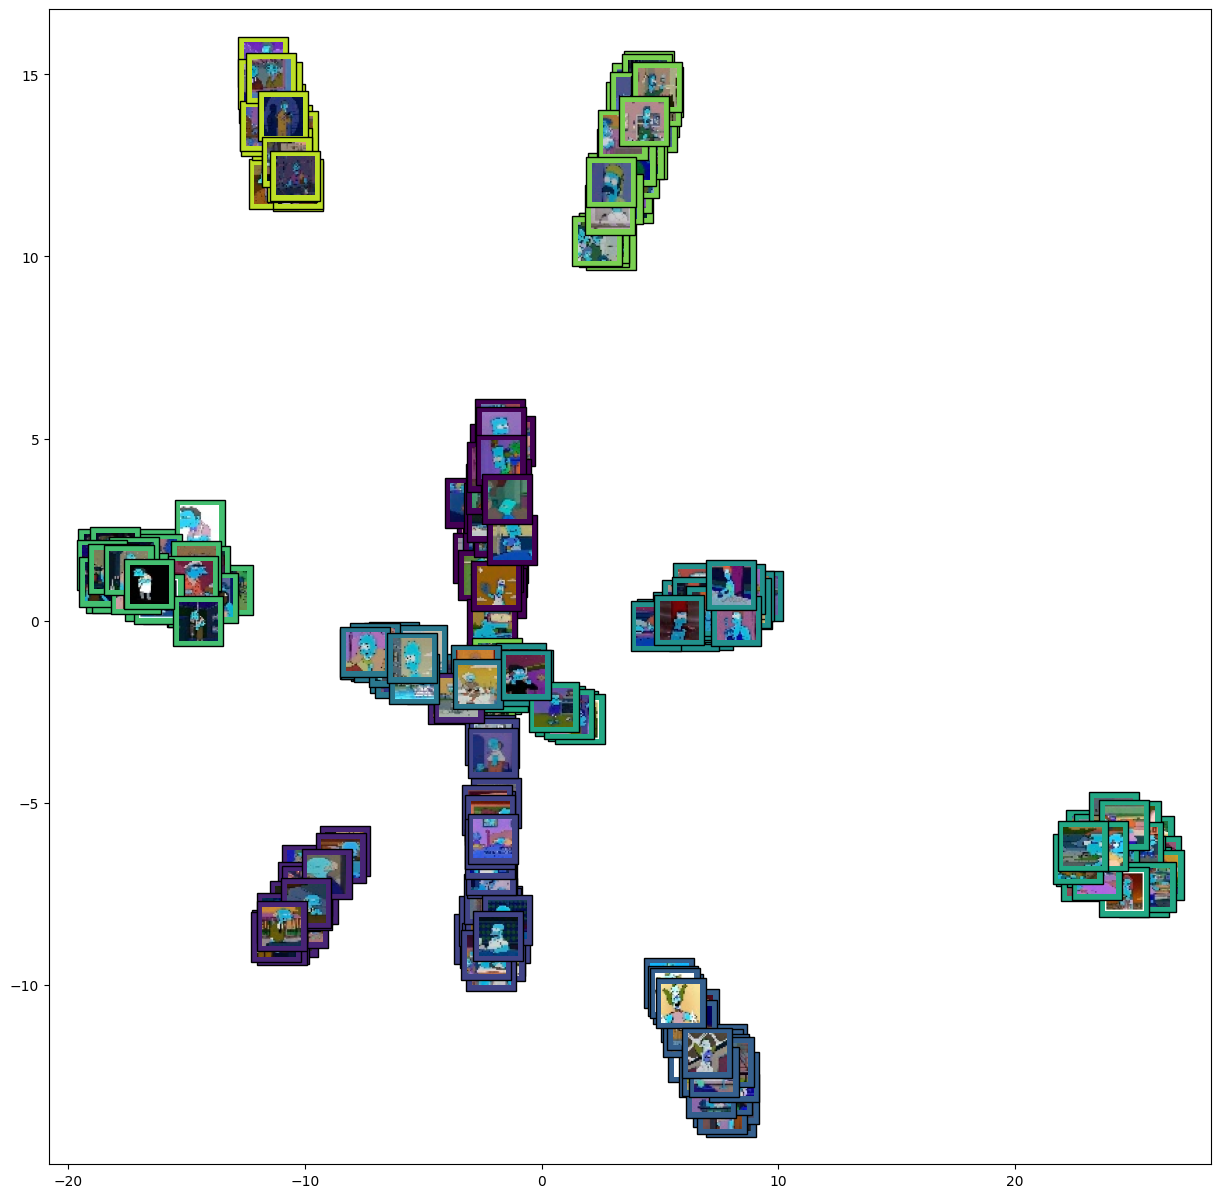

In [215]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(transformed[:, 0], transformed[:, 1], c=np.where(1 == y_train[:num_images])[1])

for i, t in enumerate(transformed):
    ab = AnnotationBbox(
        OffsetImage(X_train[i]),
        (t[0], t[1]),
        bboxprops=dict(fill=True, fc=plt.get_cmap("viridis")(np.where(1 == y_train[i])[0][0] / num_classes)),
    )
    ax.add_artist(ab)

plt.show()